<a href="https://colab.research.google.com/github/mahekbagde/ML/blob/main/pract4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression using tensorflow

In [2]:
!pip install -q seaborn

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

In [4]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.15.0


In [6]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']
raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?',comment='\t',
                          sep=' ',skipinitialspace=True)

In [7]:
dataset = raw_dataset.copy()
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [9]:
dataset = dataset.dropna()

In [10]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3:'Japan'})

In [11]:
dataset=pd.get_dummies(dataset,columns=['Origin'], prefix='',prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [12]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

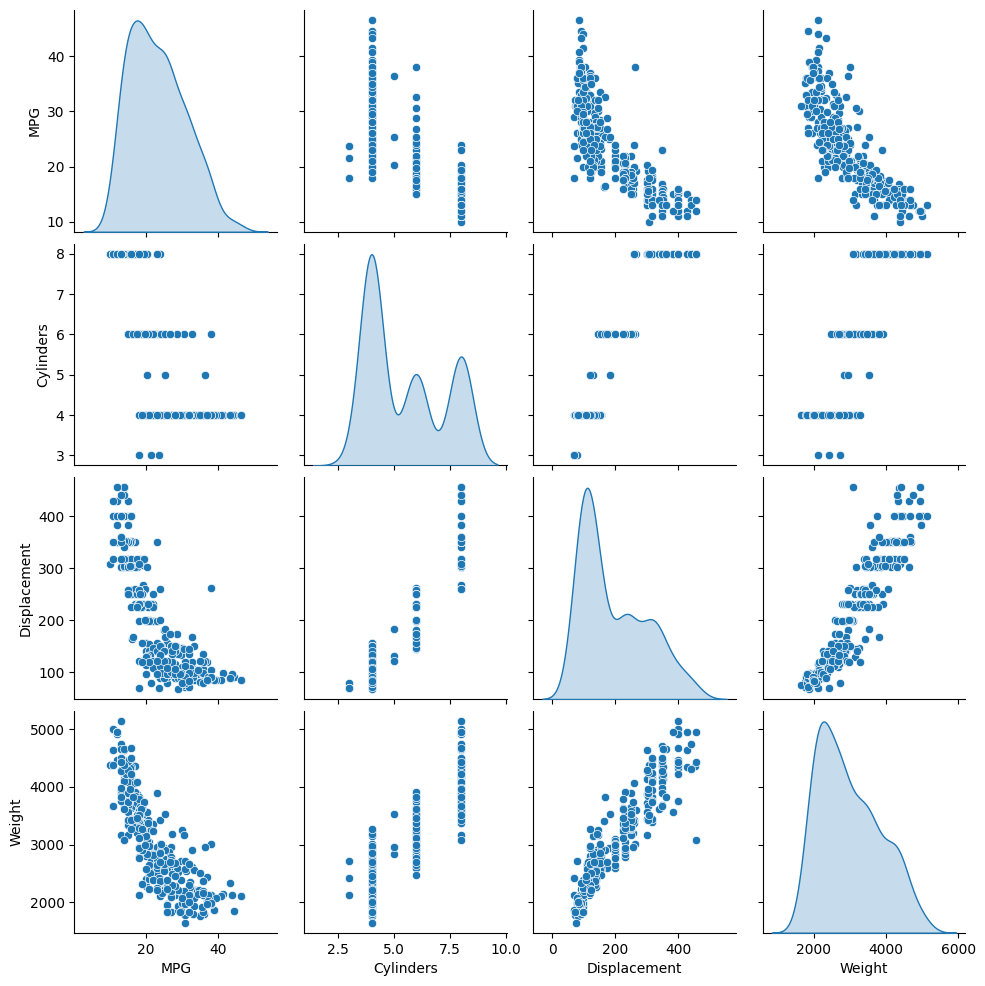

In [13]:
sns.pairplot(train_dataset[['MPG','Cylinders','Displacement','Weight']], diag_kind='kde')

In [14]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [15]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels =train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [16]:
train_dataset.describe().transpose()[['mean','std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [17]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [18]:
normalizer.adapt(np.array(train_features))

In [19]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [20]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [21]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [22]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [23]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 91ms/step


array([[ 0.858],
       [ 0.484],
       [-1.583],
       [ 1.202],
       [ 1.087],
       [ 0.427],
       [ 1.288],
       [ 1.087],
       [ 0.283],
       [ 0.484]], dtype=float32)

In [24]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [25]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.32 s, sys: 183 ms, total: 5.51 s
Wall time: 6.09 s


In [26]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.802182,4.175726,95
96,3.804202,4.179674,96
97,3.804782,4.189418,97
98,3.801859,4.187359,98
99,3.803355,4.195948,99


In [27]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

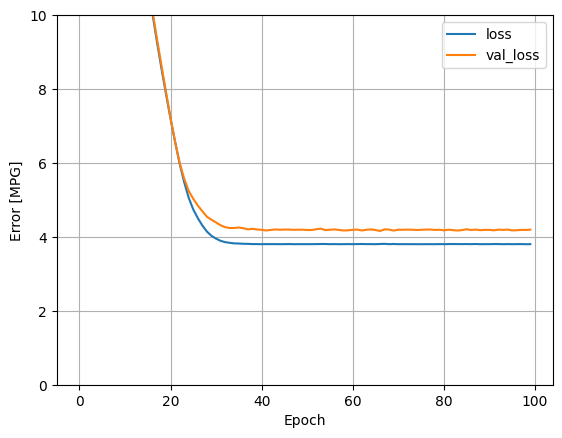

In [28]:
plot_loss(history)

In [29]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [30]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [33]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 2ms/step


In [31]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

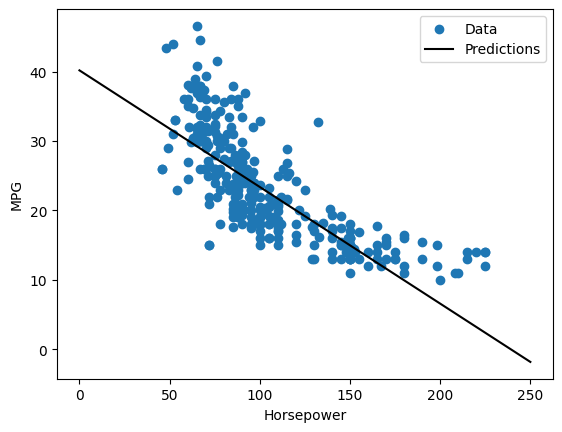

In [34]:
plot_horsepower(x, y)

# knn with tensorflow

In [35]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [36]:
data = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")
features = ["Age", "Income", "Family", "CCAvg", "Education", "Mortgage", "Securities Account", "CD Account", "Online", "CreditCard"]
X = data[features].values
y = data["Personal Loan"].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Calculate L1 distance (Manhattan distance)
distance = tf.reduce_sum(tf.abs(tf.subtract(X_train, X_test[:, np.newaxis])), axis=2)

In [40]:
# Find the indices of the k-nearest neighbors
k = 5  # You can adjust this value
indices = tf.math.top_k(-distance, k=k).indices

# Gather labels of the nearest neighbors
nearest_labels = tf.gather(y_train, indices)

# Predict the class with a majority vote
predictions = tf.reduce_sum(nearest_labels, axis=1)

# Calculate accuracy
y_pred = predictions.numpy()
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.30%


# kmean with tf

In [41]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [43]:
# Load the dataset
data = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")
# Select relevant features for clustering
features = ["Age", "Income", "Family", "CCAvg", "Education", "Mortgage", "Securities Account", "CD Account", "Online", "CreditCard"]
X = data[features].values

In [44]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [45]:
# Number of clusters (K)
K = 3

In [46]:
# Initialize centroids randomly
# Initialize centroids randomly
centroids = tf.Variable(tf.cast(tf.random.shuffle(X)[:K], dtype=tf.float32), dtype=tf.float32)

In [47]:
# Calculate distances from data points to centroids
# Calculate distances from data points to centroids
distances = tf.reduce_sum(tf.square(tf.expand_dims(tf.cast(X, tf.float32), 0) - tf.expand_dims(centroids, 1)), axis=2)

In [48]:
# Find the nearest centroid for each data point
nearest_centroids = tf.argmin(distances, axis=0)

In [49]:
# Update centroids to be the mean of data points in each cluster
new_centroids = tf.concat([tf.reduce_mean(X[tf.where(tf.equal(nearest_centroids, c))], axis=0, keepdims=True) for c in range(K)], axis=0)


In [50]:
# Training loop
max_iterations = 100
for _ in range(max_iterations):
    new_centroids_values = tf.concat([tf.reduce_mean(X[tf.where(tf.equal(nearest_centroids, c))], axis=0, keepdims=True) for c in range(K)], axis=0)
    new_centroids_values = tf.cast(new_centroids_values, tf.float32)  # Cast to float32
    new_centroids = tf.Variable(new_centroids_values, dtype=tf.float32)
    if np.all(np.isclose(centroids, new_centroids_values, rtol=1e-6, atol=1e-6)):
        break

In [51]:
# Get final cluster assignments
cluster_assignments = nearest_centroids.numpy()

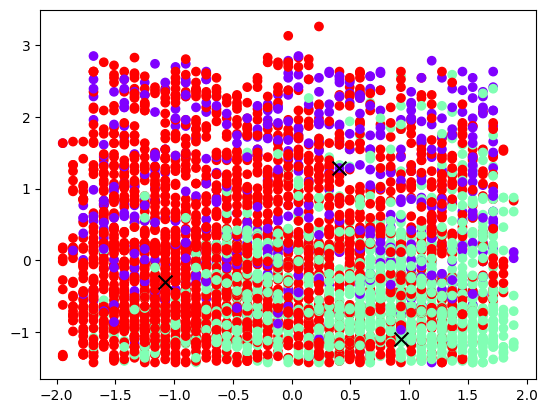

In [52]:
# Plot the data points and cluster centroids
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='x')
plt.show()


In [53]:
# Get final cluster assignments
cluster_assignments = nearest_centroids.numpy()

# You can print cluster assignments to see which data points belong to which cluster
print("Cluster Assignments:")
print(cluster_assignments)

# If you have ground truth labels, you can compare the clustering with the ground truth
# ground_truth = ...  # Replace with actual ground truth labels
# accuracy = accuracy_score(ground_truth, cluster_assignments)
# print("Accuracy:", accuracy)


Cluster Assignments:
[2 2 2 ... 1 1 2]
